In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('wine quality(mamgithub).csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [5]:
df.shape

(1599, 12)

In [6]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:>

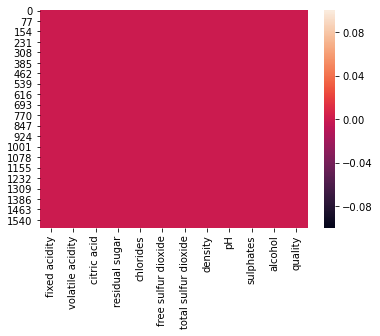

In [8]:
sns.heatmap(df.isnull())  

In [9]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# EDA

<AxesSubplot:>

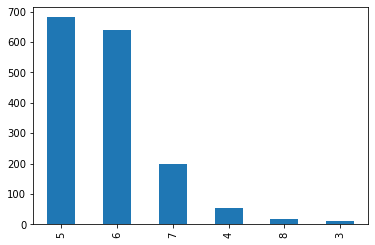

In [10]:
df['quality'].value_counts().plot.bar()

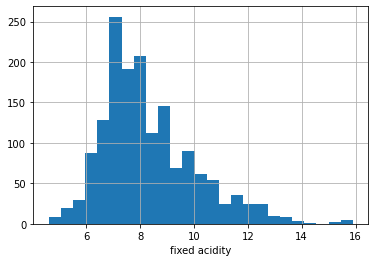

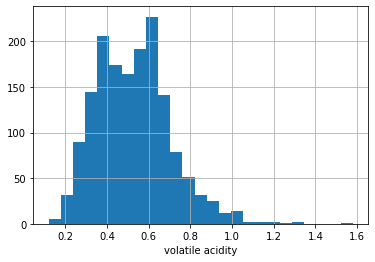

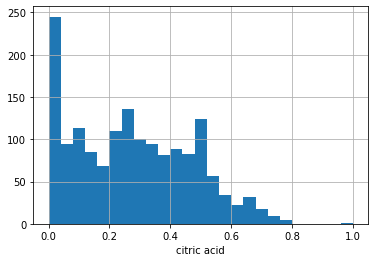

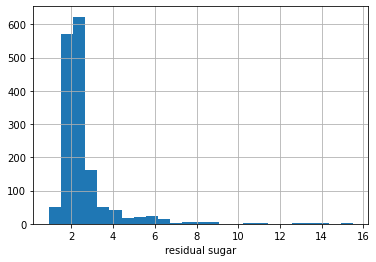

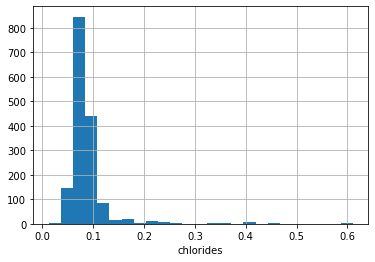

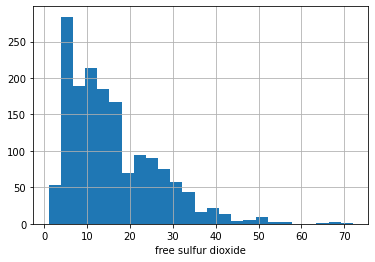

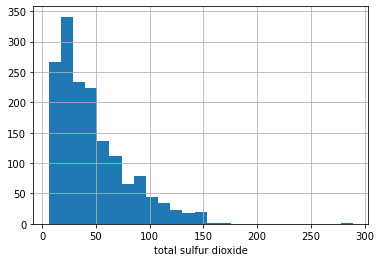

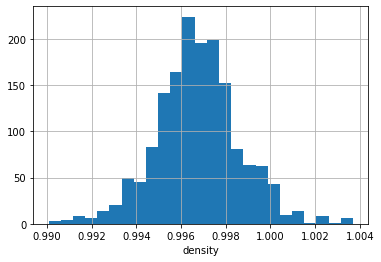

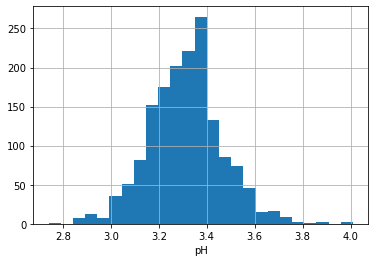

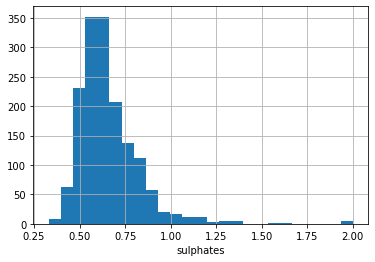

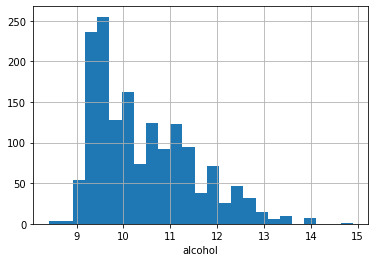

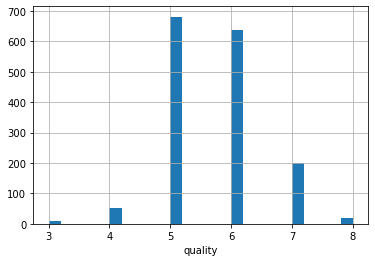

In [11]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

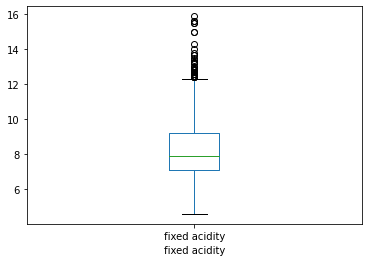

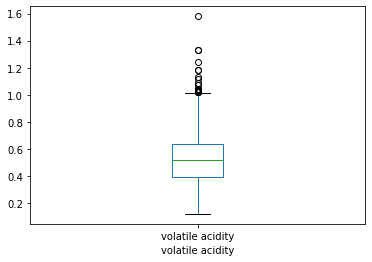

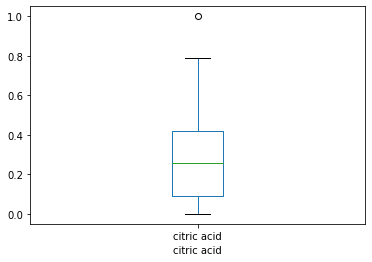

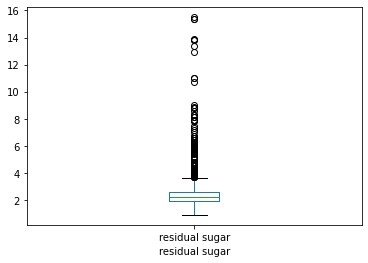

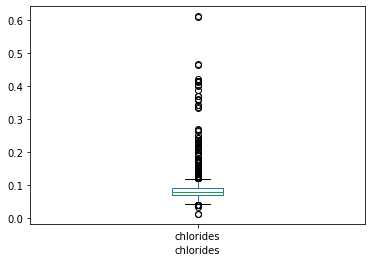

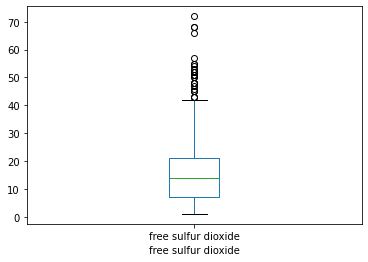

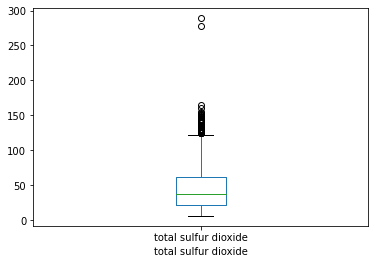

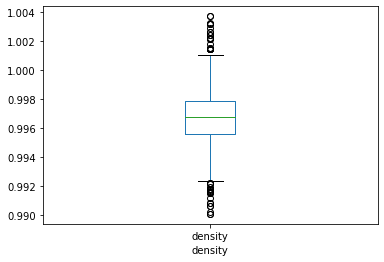

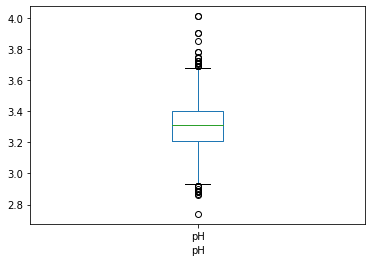

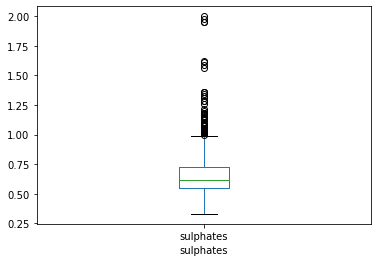

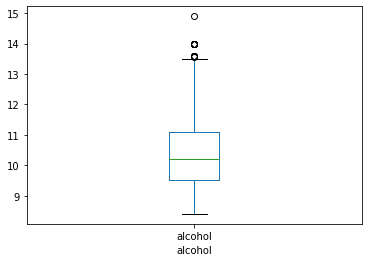

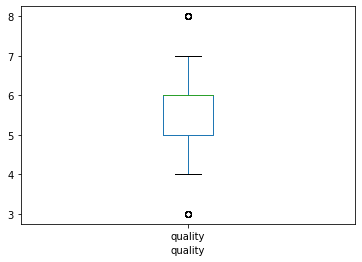

In [12]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

<AxesSubplot:>

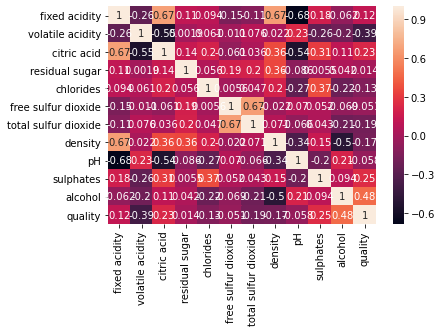

In [13]:
sns.heatmap(df.corr(),annot=True)

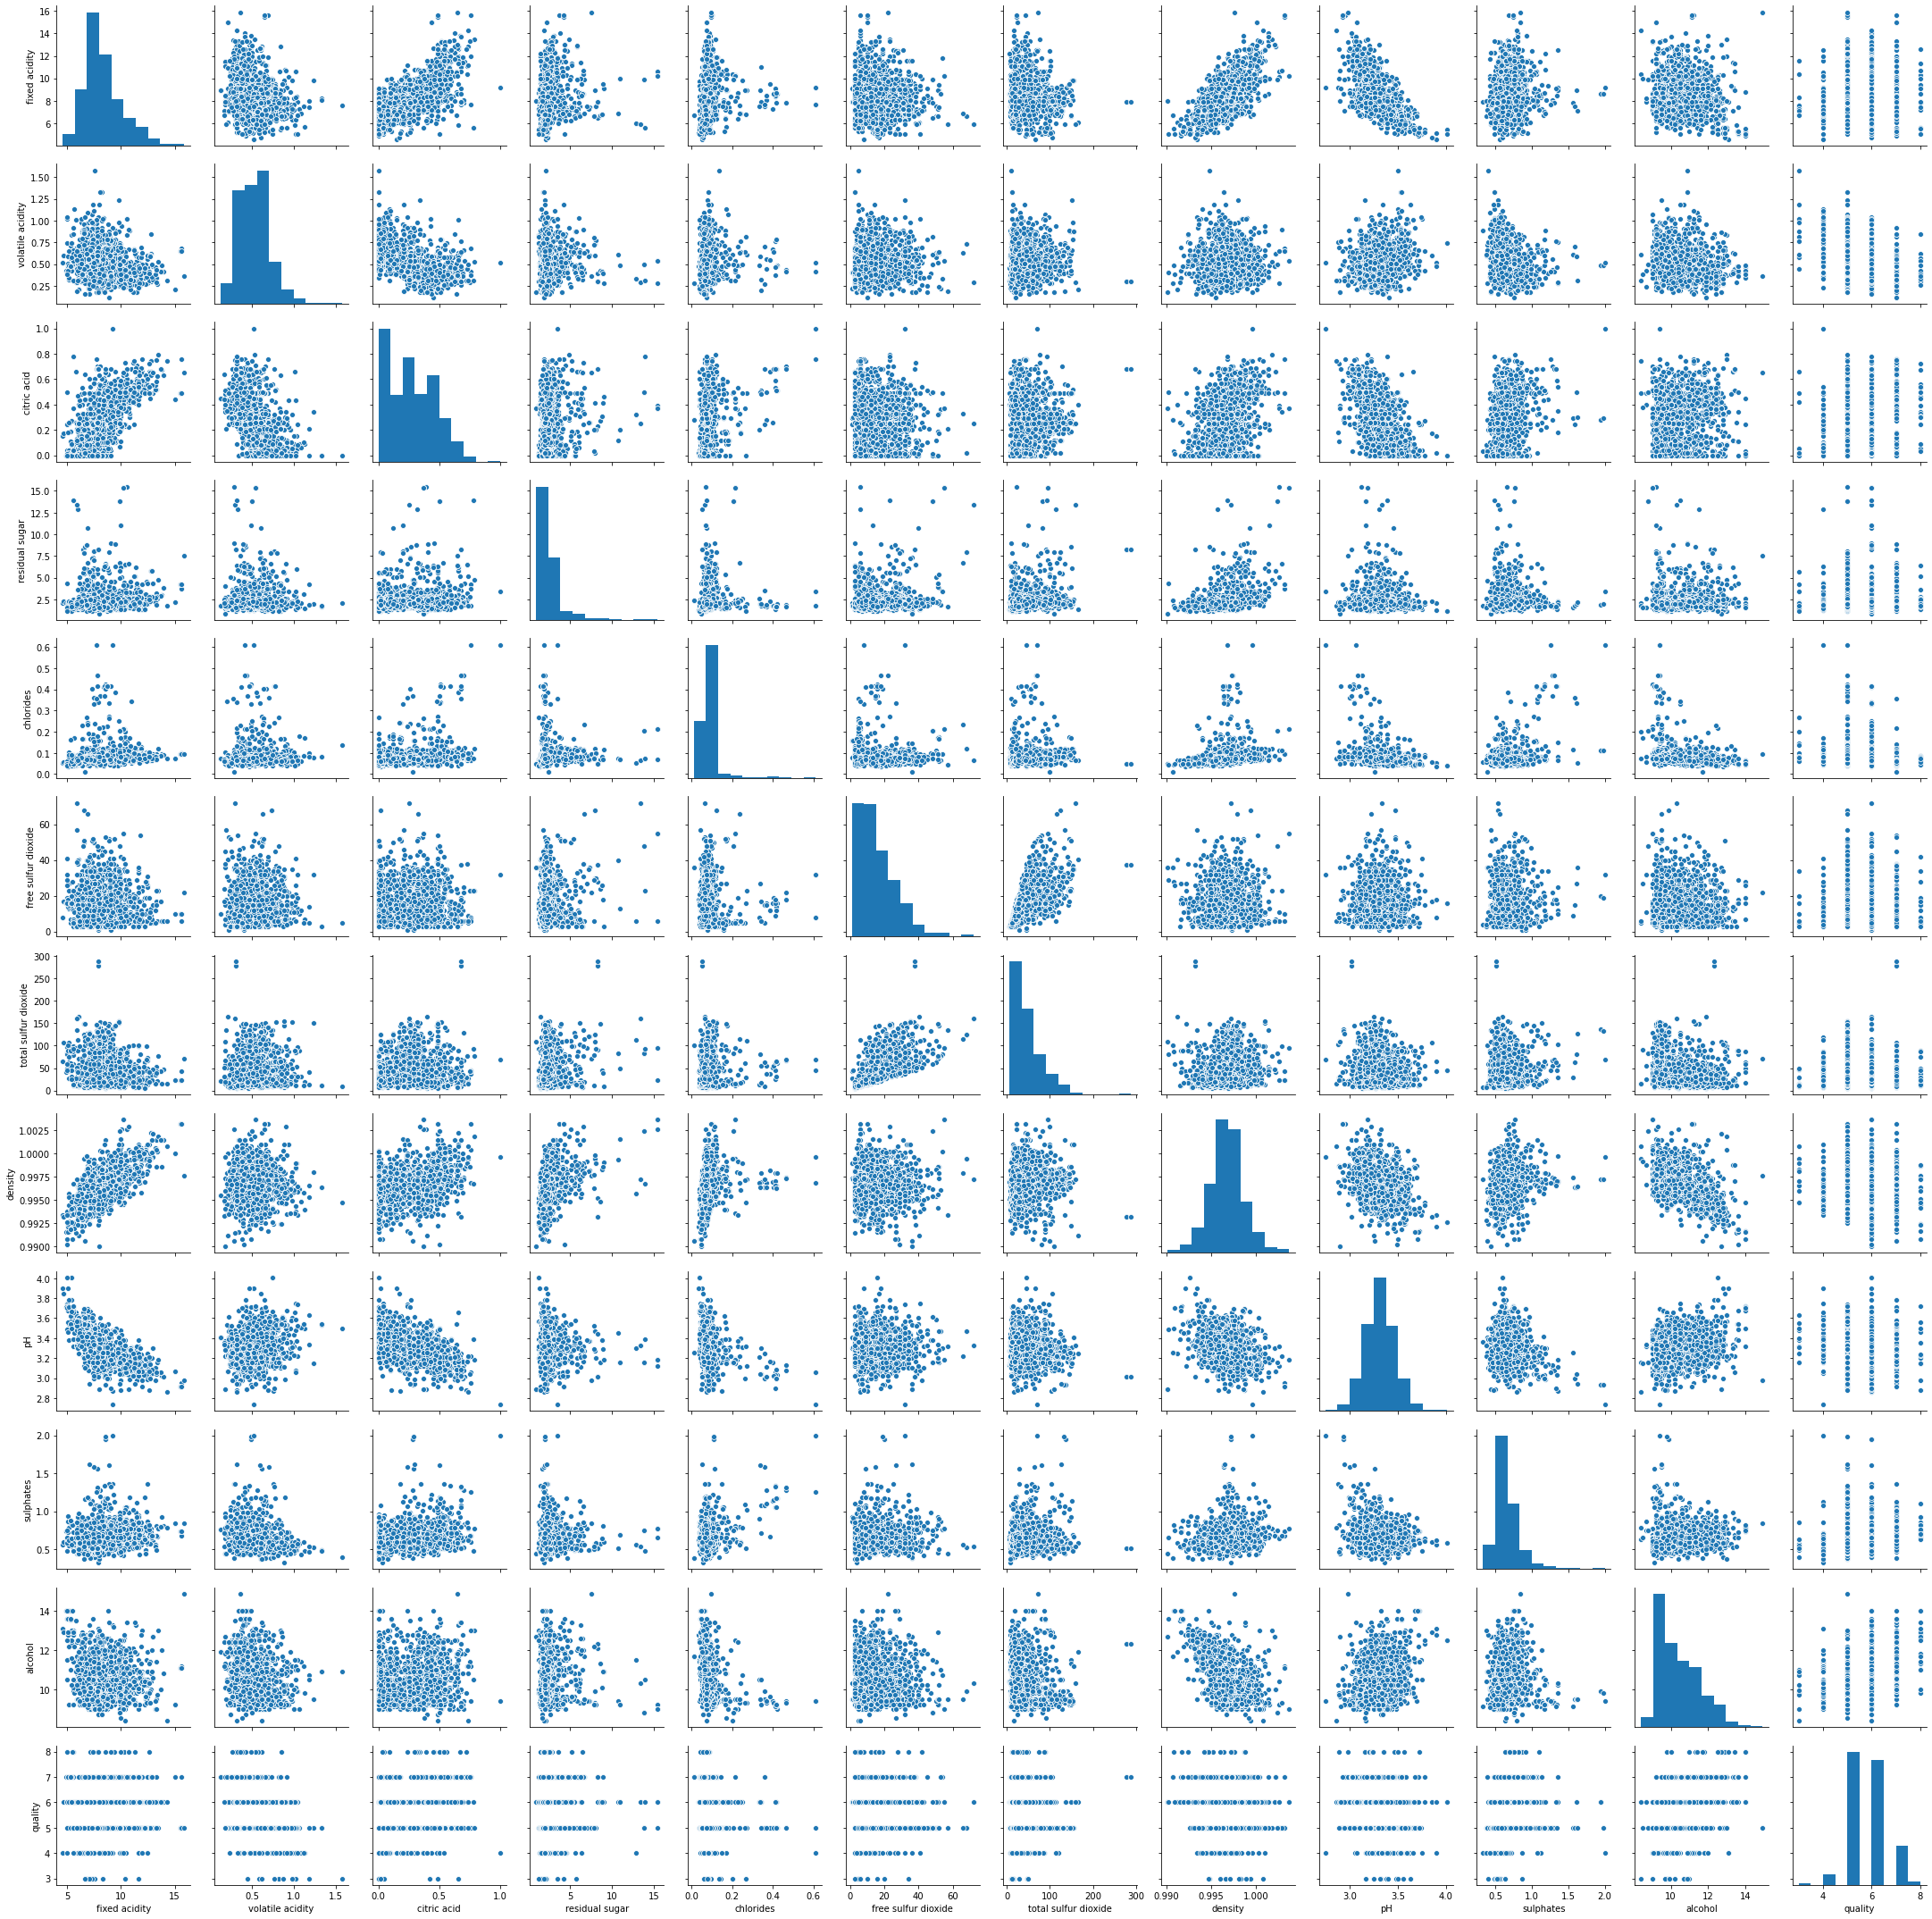

In [14]:
sns.pairplot(df)

# Feature Engineering

In [15]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [16]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

# Removing outliers by z score method

In [17]:
#Removing outliers now
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(1599, 12)

In [18]:
df=df[(z<3).all(axis=1)]
df.shape

(1451, 12)

# Segregating target and independent feature as we dont want to transform our target variable

In [19]:
y=df[['quality']]
X=df.drop(['quality'],axis=1)

# Removing skewness by power transformer method

In [20]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') # initally write code like this so you remember
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [21]:
df.skew()

fixed acidity           0.018666
volatile acidity        0.004945
citric acid             0.018049
residual sugar         -0.004606
chlorides              -0.114658
free sulfur dioxide    -0.021455
total sulfur dioxide   -0.005813
density                -0.001043
pH                     -0.000074
sulphates               0.020799
alcohol                 0.114658
dtype: float64

In [22]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


# Scaling the data

In [23]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [24]:
x.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
dtype: float64

# Model building

In [25]:
y=y
x=x

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [28]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [29]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.5840220385674931


cross_val_score  - 0.5087321083491599


classification report
               precision    recall  f1-score   support

           4       0.20      0.08      0.12        12
           5       0.65      0.68      0.66       154
           6       0.55      0.59      0.57       147
           7       0.51      0.43      0.47        46
           8       0.00      0.00      0.00         4

    accuracy                           0.58       363
   macro avg       0.38      0.36      0.36       363
weighted avg       0.57      0.58      0.57       363



[[  1   7   4   0   0]
 [  1 105  45   3   0]
 [  3  44  86  14   0]
 [  0   6  20  20   0]
 [  0   0   2   2   0]]


AxesSubplot(0.125,0.808774;0.62x0.07122

cross_val_score  - 0.5674043171838161


classification report
               precision    recall  f1-score   support

           4       0.25      0.08      0.12        12
           5       0.73      0.76      0.74       154
           6       0.61      0.65      0.63       147
           7       0.56      0.50      0.53        46
           8       1.00      0.25      0.40         4

    accuracy                           0.65       363
   macro avg       0.63      0.45      0.48       363
weighted avg       0.65      0.65      0.64       363



[[  1   6   5   0   0]
 [  2 117  35   0   0]
 [  1  36  95  15   0]
 [  0   2  21  23   0]
 [  0   0   0   3   1]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** AdaBoostClassifier *******************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score  - 0.3746556473829201


cross_val_score  - 0.3398774933794985


classifica

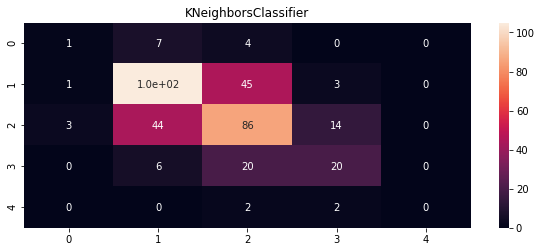

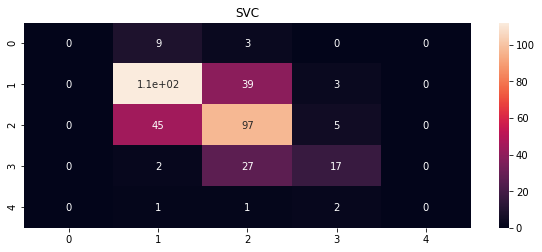

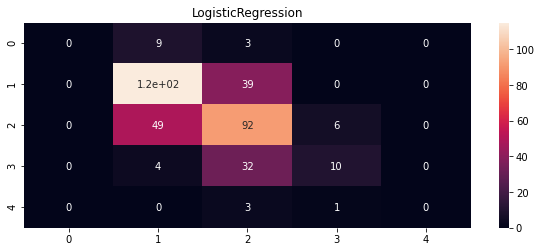

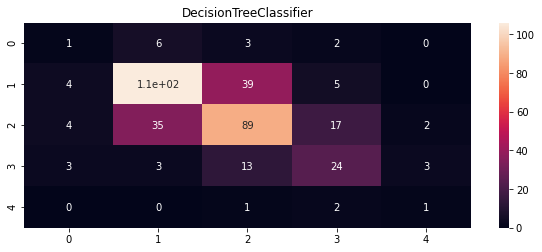

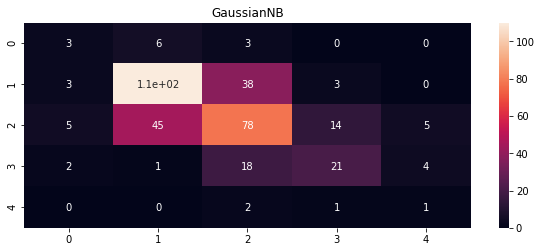

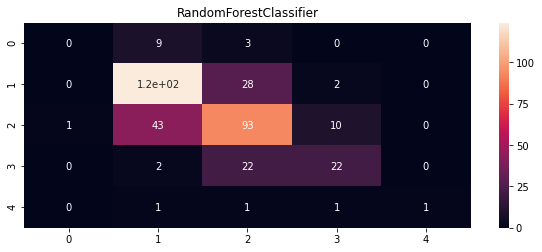

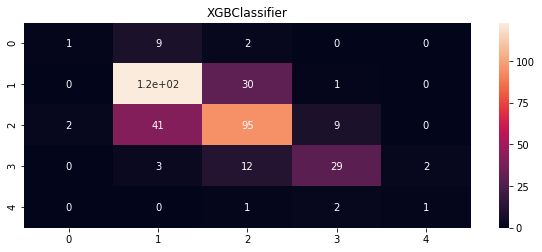

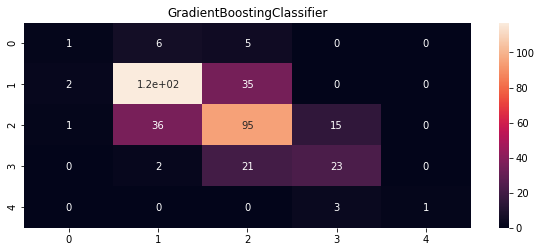

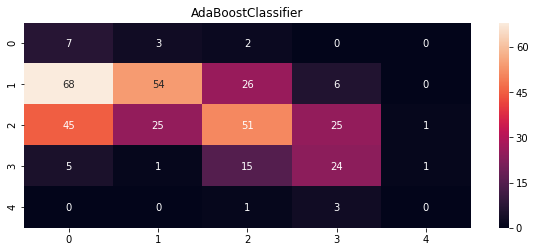

In [31]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    
    
    
    
    
    

In [32]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,58.402204,50.873211
1,SVC,62.258953,59.866526
2,LogisticRegression,59.779614,58.324023
3,DecisionTreeClassifier,60.881543,45.709566
4,GaussianNB,58.677686,56.672220
5,RandomForestClassifier,66.115702,54.249734
6,XGBClassifier,68.595041,55.430932
7,GradientBoostingClassifier,65.289256,56.740432
8,AdaBoostClassifier,37.465565,33.987749


In [33]:
#hence XGBClassifier is the best performing Algorithm at random state=42 for the taken dataset.

In [34]:
#We will apply Gridsearchcv to the top3 performing  model and try to increase the cv score.

In [35]:
#Now lets calculate the random state of the models at which they perform the best.

# Finding the best random_state for all models

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [37]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   56   which is   0.6253443526170799
knn 56
max_accuracy_score is at random_state   54   which is   0.6694214876033058
svc 54
max_accuracy_score is at random_state   87   which is   0.6446280991735537
lr 87
max_accuracy_score is at random_state   85   which is   0.6639118457300276
dt 85
max_accuracy_score is at random_state   62   which is   0.628099173553719
gnb 62
max_accuracy_score is at random_state   88   which is   0.7052341597796143
rfc 88
max_accuracy_score is at random_state   68   which is   0.7355371900826446
xgb 68
max_accuracy_score is at random_state   51   which is   0.6914600550964187
gbc 51
max_accuracy_score is at random_state   85   which is   0.559228650137741
ada 85


In [38]:
#We can see xgb is performing the best at random state=68
#But we dint reach our target of 90% accuracy.
#So to reach the target of 90% accuracy we will try the gridsearchcv & stacking technique by taking 3 top performing models. 

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,stratify=y)
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('Accuracy_score=  ',accuracy_score(y_test,pred))

Accuracy_score=   0.7355371900826446


In [40]:
#selecting our top 3 performing models 
#model-1-->xgb(accuracy=73.55%) at random_state=68
#model-2-->rfc(accuracy=71.90%) at random_state=85
#model-3-->gbc(accuracy=69.14%) at random_state=51
#model-4-->svc(accuracy=66.94%) at random_state=54

# Gridsearchcv for top 3 performing models

# model-1-->xgb(accuracy=73.55%) at random_state=68

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,stratify=y)
xgb=XGBClassifier()

In [42]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=5)
grid_search=gscv.fit(x_train,y_train)
grid_search.best_params_

{'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 5}

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=68,stratify=y)
xgb=XGBClassifier(colsample_bytree=0.9,learning_rate=0.1,max_depth=8)
xgb.fit(x_train,y_train)
pred=xgb.predict(x_test)
print('Accuracy_score=  ',accuracy_score(y_test,pred))


Accuracy_score=   0.7079889807162535


In [45]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(n_estimators=100,learning_rate=0.001,max_depth=5)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5667523897461744


array([[  0,   5,   3,   1,   0],
       [ 32, 424, 214,  16,   0],
       [ 13, 184, 331, 101,  10],
       [  2,   4,  37,  66,   5],
       [  0,   0,   1,   1,   1]], dtype=int64)

# model-2-->rfc(accuracy=71.90%) at random_state=85

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,stratify=y)
rfc=RandomForestClassifier()

In [47]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'criterion':['gini','entropy'], 'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=85,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,n_estimators=100)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
score=accuracy_score(y_test,pred_rfc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.7107438016528925


In [49]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,n_estimators=100)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5846977084293103


array([[  0,   3,   1,   0,   0],
       [ 34, 443, 210,  16,   0],
       [ 12, 166, 336,  95,   9],
       [  1,   5,  38,  71,   7],
       [  0,   0,   1,   3,   0]], dtype=int64)

# model-3-->gbc(accuracy=69.14%) at random_state=51

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,stratify=y)
gbc=GradientBoostingClassifier()

In [51]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1],
            'learning_rate':[0.1,0.05,0.001], 'n_estimators':[50,100]}]
            
grid_search=GridSearchCV(gbc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 100}

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,stratify=y)
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=9,min_samples_leaf=1,n_estimators=100)
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
score=accuracy_score(y_test,pred_gbc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.7107438016528925


In [53]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=9,min_samples_leaf=1,n_estimators=100)
cvs=cross_val_score(gbc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gbc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.54941543695747


array([[  0,  13,   6,   1,   0],
       [ 27, 412, 210,  22,   1],
       [ 19, 181, 313,  92,   7],
       [  1,   6,  51,  61,   8],
       [  0,   5,   6,   9,   0]], dtype=int64)

# model-4-->svc(accuracy=66.94%) at random_state=54

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,stratify=y)
svc=SVC()

In [55]:
from sklearn.model_selection import GridSearchCV

parameters=[{'kernel':['rbf','linear'],'C':[1,2,3,5,10],'gamma':[0.1,1,10]}]
            
grid_search=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,stratify=y)
svc=SVC(C=1,gamma=0.1,kernel='rbf')
svc.fit(x,y)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.7300275482093664


In [57]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=1,gamma=0.1,kernel='rbf')
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5944878145804595


array([[  0,   0,   1,   0,   0],
       [ 37, 456, 210,  16,   0],
       [  9, 154, 347, 110,  10],
       [  1,   7,  28,  59,   6],
       [  0,   0,   0,   0,   0]], dtype=int64)

# Stacking top3 performing models

In [58]:
from mlxtend.classifier import StackingClassifier

In [59]:
xgb=XGBClassifier(random_state=68)
rfc=RandomForestClassifier(random_state=85)
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=5,min_samples_leaf=1,n_estimators=100,random_state=51)

In [60]:
sclf=StackingClassifier(classifiers=[xgb,rfc,gbc],use_probas=True,meta_classifier=gnb)#gnb=GaussianNB()

In [61]:
for clf,label in zip([xgb,rfc,gbc,sclf],['XGBClassifier','RandomForestClassifier','GradientBoostingClassifier','StackingClassifier']):
    scores=cross_val_score(clf,x,y,cv=10,scoring='accuracy')
    print('CVscore=',scores.mean(),label)

CVscore= 0.5543093197147662 XGBClassifier
CVscore= 0.5625952360171029 RandomForestClassifier
CVscore= 0.5554205041074891 GradientBoostingClassifier
CVscore= 0.547908362328789 StackingClassifier


In [62]:
for clf,label in zip([xgb,rfc,gbc,sclf],['XGBClassifier','RandomForestClassifier','GradientBoostingClassifier','StackingClassifier']):
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    scores=accuracy_score(y_test,pred)
    print('Accuracyscore=',scores,label)

Accuracyscore= 0.7107438016528925 XGBClassifier
Accuracyscore= 0.6694214876033058 RandomForestClassifier
Accuracyscore= 0.6942148760330579 GradientBoostingClassifier
Accuracyscore= 0.699724517906336 StackingClassifier


In [ ]:
#saving of this model ,i will do later in some other upgraded project.
#I am saving here the SVC model as our CV score is the highest in Gridsearchcv methods.

# saving the final SVC model

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=54,stratify=y)
svc=SVC(C=1,gamma=0.1,kernel='rbf')
svc.fit(x,y)
pred_svc=svc.predict(x_test)
score=accuracy_score(y_test,pred_svc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.7300275482093664


In [73]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(C=1,gamma=0.1,kernel='rbf')
svc.fit(x,y)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=10)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.5944878145804595


array([[  0,   0,   1,   0,   0],
       [ 37, 456, 210,  16,   0],
       [  9, 154, 347, 110,  10],
       [  1,   7,  28,  59,   6],
       [  0,   0,   0,   0,   0]], dtype=int64)

In [74]:
from sklearn.externals import joblib
joblib.dump(svc,'project3.obj')

['project3.obj']

In [75]:
model=joblib.load('project3.obj')

In [76]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['quality'])

# Saving final predictions in file.csv 

In [77]:
final_predictions.to_csv('E:\\final_predictionswine.csv',index=False)

# Conclusion:-